In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm
import astropy.units as u 
from astropy.coordinates import SkyCoord
import regions
from regions import Regions

from spectral_cube import SpectralCube
import importlib as imp

from dust_extinction.averages import CT06_MWLoc, I05_MWAvg, CT06_MWGC, G21_MWAvg, RL85_MWGC, RRP89_MWGC, F11_MWGC


In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
import moment_maker as mm
from jwst_plots import JWSTCatalog, make_cat_use
import cutout_manager as cm
import jwst_plots
import co_ice as co_map
import extinction as ex


In [4]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [5]:
cat_use = make_cat_use()

# Select Red Clump Stars

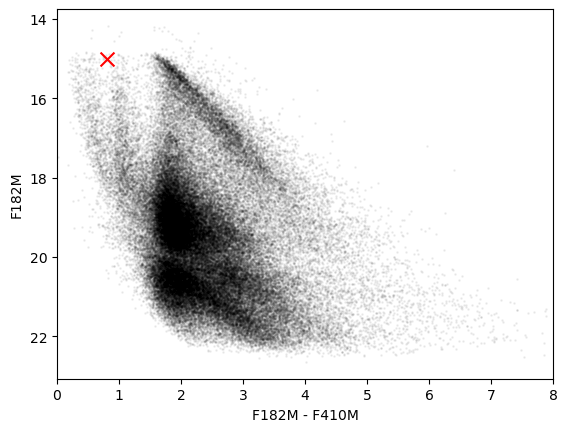

In [ ]:
ax = plt.subplot(111)
cat_use.plot_CMD('f182m', 'f410m', 'f182m', s=1, color='k', alpha=0.05, ax=ax)
ax.set_xlim(0, 8)

x1, y1 = 1.8, 15.5
x2, y2 = 3.5, 19
ax.plot([x1, x2], [y1, y2], color='r', lw=2)
#ax.scatter(x1, y1, s=100, color='r', marker='x')